## MDS Thesis
#### 03. Visualize results

<br>
<hr style="opacity: 0.5">

### Setup

In [2]:
# had to install statsmodels this way
#!/Users/varvarailyina/hertie/mds_thesis/env/bin/python -m pip install statsmodels

In [2]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
# set wd
os.chdir("/Users/varvarailyina/hertie/mds_thesis")

-- *Load data*

In [4]:
# load clean data
df_clean = pd.read_csv('./data/out/df_clean.csv')

-- *Clean `month` column*

In [5]:
# convert to string and remove trailing '.0'
df_clean['month'] = df_clean['month'].astype(str).str.replace('.0', '', regex=False)

# pad to 4 characters just in case (e.g., '907' → '0907')
df_clean['month'] = df_clean['month'].str.zfill(4)

# convert to datetime (adds '20' prefix to turn '1307' → '2013-07-01')
df_clean['month_dt'] = pd.to_datetime('20' + df_clean['month'], format='%Y%m')

-- *Clean `date` column*

In [6]:
# strip time from `date` and convert to a string
df_clean['date'] = pd.to_datetime(df_clean['date']).dt.date
df_clean['date'] = df_clean['date'].astype(str)

# set `date` as datetime without time
#df_clean['date'] = pd.to_datetime(df_clean['date']).dt.normalize()

-- *Specify things*

In [7]:
# specify emotion columns
emotion_cols = ['anger', 'fear', 'disgust', 'sadness', 'joy', 'enthusiasm', 'pride', 'hope']

In [8]:
# define party colors
party_colors = {
    'CDU/CSU': '#000000',  # Black
    'SPD': '#E3000F',      # Red
    'Greens': '#46962B', # Green
    'FDP': '#FFED00',      # Yellow
    'Left': '#8C3473', # Purple
    'AfD': '#009EE0'       # Blue
}

# define emotion colors
emotion_colors = {
    'anger': '#e63946',
    'fear': '#6a4c93',
    'disgust': '#43aa8b',
    'sadness': '#577590',
    'joy': '#f4a261',
    'enthusiasm': '#2a9d8f',
    'pride': '#f77f00',
    'hope': '#90be6d'
}

<hr style="opacity: 0.25">

### Visualize results

-- *Emotional density by party*

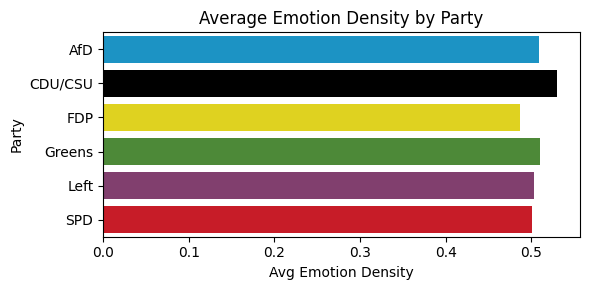

In [29]:
# average emotion density by party
plt.figure(figsize=(6, 3))
sns.barplot(data=df_clean, x='emotion_density', y='party', estimator=np.mean, ci=None, palette=party_colors)
plt.title('Average Emotion Density by Party')
plt.xlabel('Avg Emotion Density')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

-- *Total mentions of each emotion*

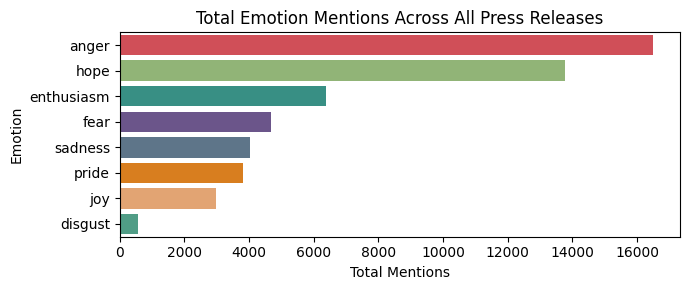

In [30]:
# total emotion mentions summed across all press releases
emotion_totals = df_clean[emotion_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 3))
sns.barplot(x=emotion_totals.values, y=emotion_totals.index, palette=emotion_colors)
plt.title('Total Emotion Mentions Across All Press Releases')
plt.xlabel('Total Mentions')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

-- *Distribution of total emotions across parties*

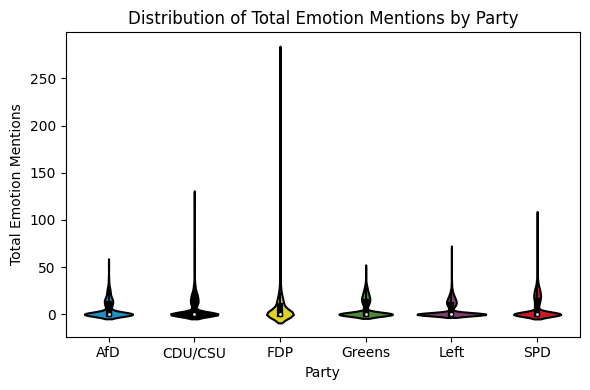

In [31]:
# violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_clean, x='party', y='total_emotion_mentions', palette=party_colors, inner='box')
plt.title('Distribution of Total Emotion Mentions by Party')
plt.xlabel('Party')
plt.ylabel('Total Emotion Mentions')
plt.tight_layout()
plt.show()

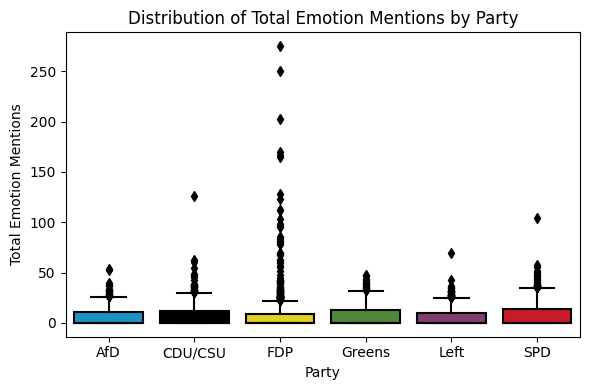

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x='party', y='total_emotion_mentions', palette=party_colors)
plt.title('Distribution of Total Emotion Mentions by Party')
plt.xlabel('Party')
plt.ylabel('Total Emotion Mentions')
plt.tight_layout()
plt.show()

-- *Distribution of each emotion over time*

In [9]:
## normalized

# melt normalized emotion columns
emotion_cols_norm = [col + '_norm' for col in emotion_cols]

df_melted = df_clean.melt(
    id_vars=['month_dt'], 
    value_vars=emotion_cols_norm, 
    var_name='emotion', 
    value_name='value'
)
df_melted['emotion'] = df_melted['emotion'].str.replace('_norm', '')

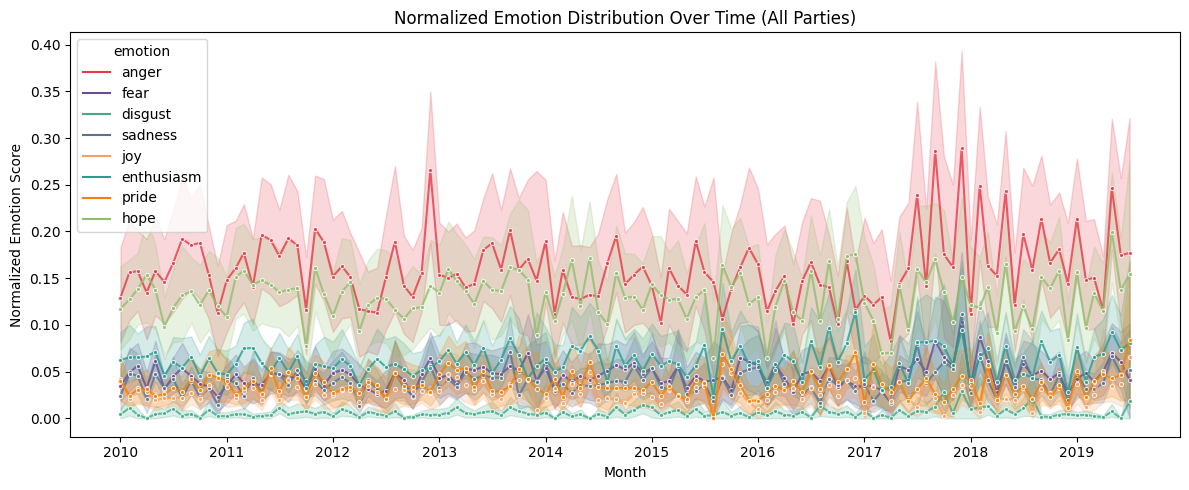

In [49]:
# plot
plt.figure(figsize=(12, 5))
lineplot = sns.lineplot(data=df_melted, x='month_dt', y='value', hue='emotion', palette=emotion_colors, marker='o', alpha=0.8)

# set marker size within lines
for line in lineplot.get_lines():
    line.set_markersize(3)

plt.title('Normalized Emotion Distribution Over Time (All Parties)')
plt.xlabel('Month')
plt.ylabel('Normalized Emotion Score')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
## not normalized

# convert date column to datetime if it's not already
df_clean = df_clean.copy()
df_clean['date'] = pd.to_datetime(df_clean['date'])

# resample by month
df_time = df_clean.set_index('date').resample('M')[emotion_cols].mean()

# melt the resampled DataFrame
df_time_reset = df_time.reset_index().melt(id_vars='date', var_name='emotion', value_name='value')

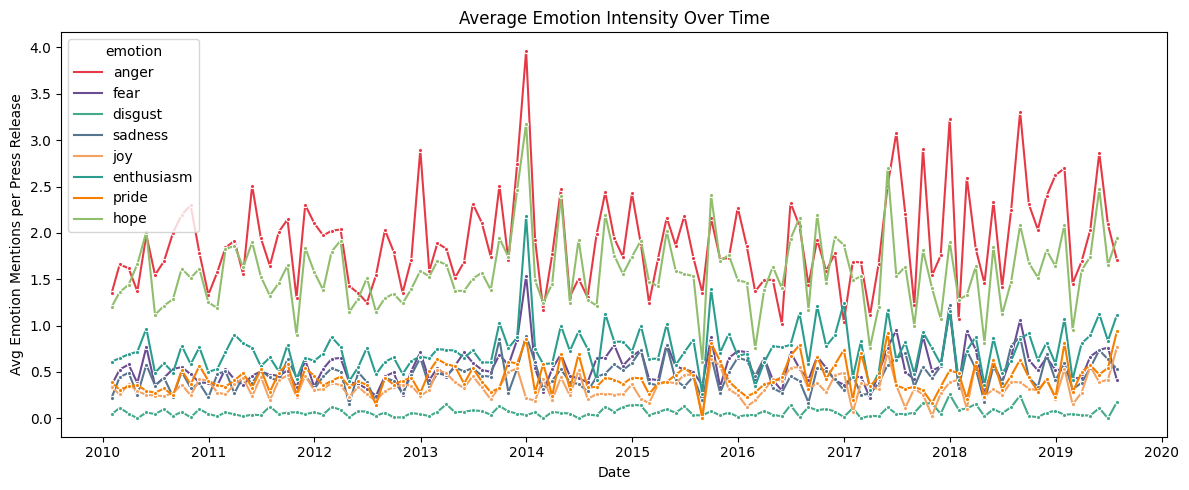

In [48]:
# plot using seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=df_time_reset,
    x='date',
    y='value',
    hue='emotion',
    palette=emotion_colors,
    marker='o',
    markersize=3,
    linewidth=1.5
)

plt.title('Average Emotion Intensity Over Time')
plt.ylabel('Avg Emotion Mentions per Press Release')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-- *Most emotional press releases*

In [55]:
# top 10 most emotional press releases
top_emotional = df_clean.sort_values(by='emotion_density', ascending=False).head(10)

# truncate text for display
top_emotional['text'] = top_emotional['text'].str[:100] + '...'

# print preview
print(top_emotional[['party', 'date', 'emotion_density', 'text']])

        party       date  emotion_density  \
230       AfD 2017-07-07         3.500000   
6178     Left 2014-11-03         3.500000   
1514  CDU/CSU 2014-09-03         3.285714   
7797      SPD 2012-08-13         3.200000   
306       AfD 2018-02-21         3.125000   
6403     Left 2015-11-14         3.000000   
5147     Left 2010-07-21         3.000000   
6223     Left 2015-01-08         3.000000   
4809   Greens 2017-10-02         3.000000   
5788     Left 2013-01-28         3.000000   

                                                   text  
230   Der Spitzenkandidat der Af D, Alexander Gaulan...  
6178  „Die Bundesregierung muss Schluss machen mit S...  
1514  „Die Veröffentlichung eines Hinrichtungsvideos...  
7797  Zur Situation in der Türkei, erklärt die stell...  
306   Zum heutigen Welttag der sozialen Gerechtigkei...  
6403  Zu den Terroranschlägen in Paris erklären die ...  
5147  „Die Reform der Bundeswehr wird vom falschen E...  
6223  Ich bin zutiefst erschüttert über 

In [57]:
top_emotional

party       date month  issue_mono  \
230       AfD 2017-07-07  1707       191.0   
6178     Left 2014-11-03  1411         7.0   
1514  CDU/CSU 2014-09-03  1409       191.0   
7797      SPD 2012-08-13  1208       191.0   
306       AfD 2018-02-21  1802        13.0   
6403     Left 2015-11-14  1511       191.0   
5147     Left 2010-07-21  1007        16.0   
6223     Left 2015-01-08  1501         2.0   
4809   Greens 2017-10-02  1710       191.0   
5788     Left 2013-01-28  1301       191.0   

                                                   text  anger  fear  disgust  \
230   Der Spitzenkandidat der Af D, Alexander Gaulan...    3.0   3.0      1.0   
6178  „Die Bundesregierung muss Schluss machen mit S...    7.0   6.0      3.0   
1514  „Die Veröffentlichung eines Hinrichtungsvideos...    6.0   4.0      4.0   
7797  Zur Situation in der Türkei, erklärt die stell...    5.0   4.0      1.0   
306   Zum heutigen Welttag der sozialen Gerechtigkei...    6.0   4.0      6.0   
6403  Zu den Terroranschlägen in Paris erklären die ...    6.0   7.0      2.0   
5147  „Die Reform der Bundeswehr wird vom falschen E...    6.0   5.0      2.0   
6223  Ich bin zutiefst erschüttert über das Massaker...    7.0   6.0      4.0   
4809  Zum Angriff in Las Vegas erklären die Fraktion...    2.0   2.0      2.0   
5788  „Die Eskalation der Gewalt zwei Jahre nach Rev...    6.0   6.0      1.0   

      sadness  joy  ...  emotion_density  anger_share  fear_share  \
230       3.0  0.0  ...         3.500000        21.43       21.43   
6178      4.0  1.0  ...         3.500000        20.00       17.14   
1514      5.0  0.0  ...         3.285714        26.09       17.39   
7797      4.0  0.0  ...         3.200000        31.25       25.00   
306       7.0  0.0  ...         3.125000        24.00       16.00   
6403      3.0  0.0  ...         3.000000        22.22       25.93   
5147      6.0  0.0  ...         3.000000        28.57       23.81   
6223      5.0  0.0  ...         3.000000        23.33       20.00   
4809      3.0  0.0  ...         3.000000        22.22       22.22   
5788      5.0  0.0  ...         3.000000        25.00       25.00   

      disgust_share  sadness_share  joy_share  enthusiasm_share  pride_share  \
230            7.14          21.43       0.00             14.29         0.00   
6178           8.57          11.43       2.86             14.29         8.57   
1514          17.39          21.74       0.00              4.35         4.35   
7797           6.25          25.00       0.00              6.25         0.00   
306           24.00          28.00       0.00              4.00         0.00   
6403           7.41          11.11       0.00             14.81         0.00   
5147           9.52          28.57       0.00              4.76         0.00   
6223          13.33          16.67       0.00             13.33         0.00   
4809          22.22          33.33       0.00              0.00         0.00   
5788           4.17          20.83       0.00             12.50         0.00   

      hope_share   month_dt  
230        14.29 2017-07-01  
6178       17.14 2014-11-01  
1514        8.70 2014-09-01  
7797        6.25 2012-08-01  
306         4.00 2018-02-01  
6403       18.52 2015-11-01  
5147        4.76 2010-07-01  
6223       13.33 2015-01-01  
4809        0.00 2017-10-01  
5788       12.50 2013-01-01  

[10 rows x 33 columns]

-- *Line plot of each emotion by party over time (monthly)*

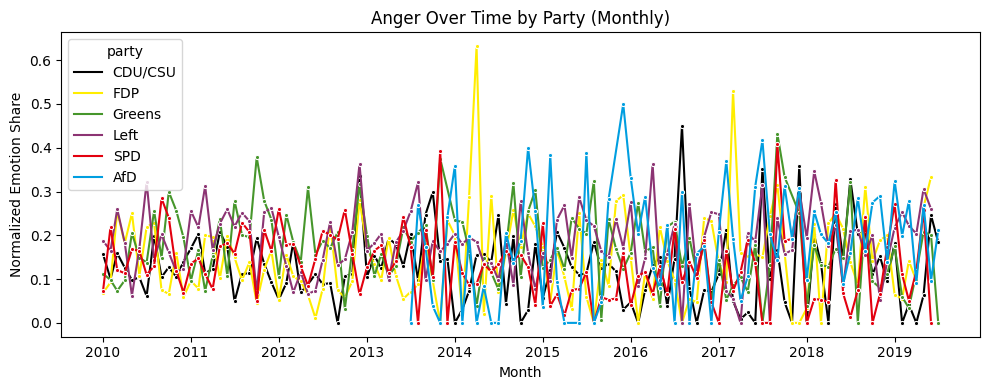

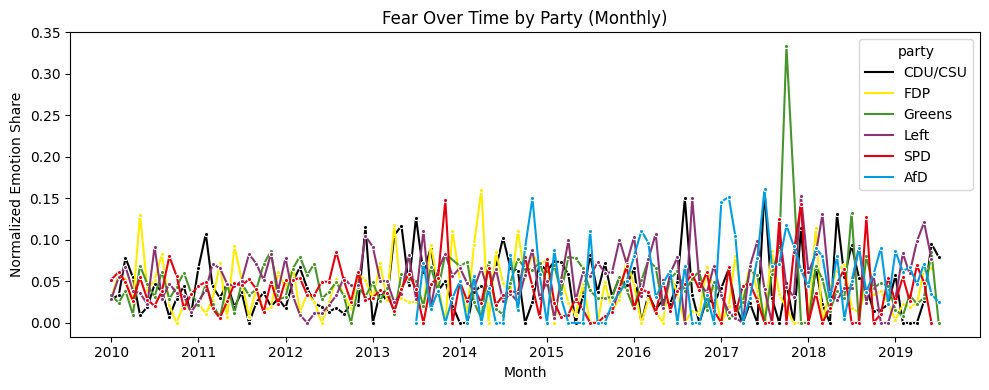

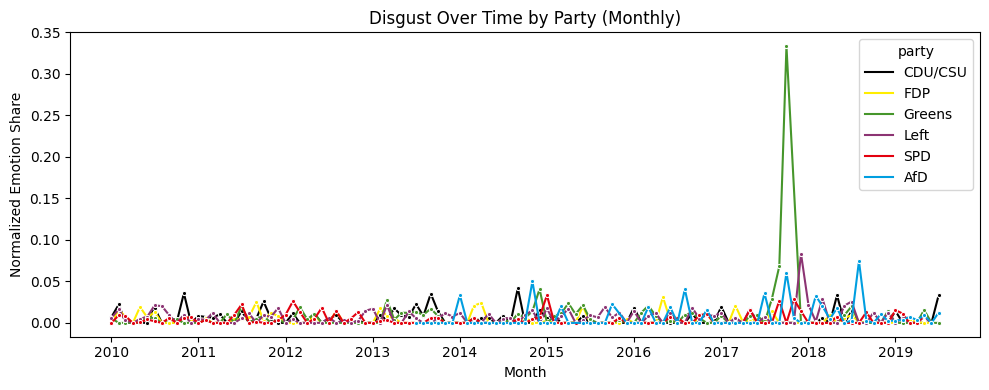

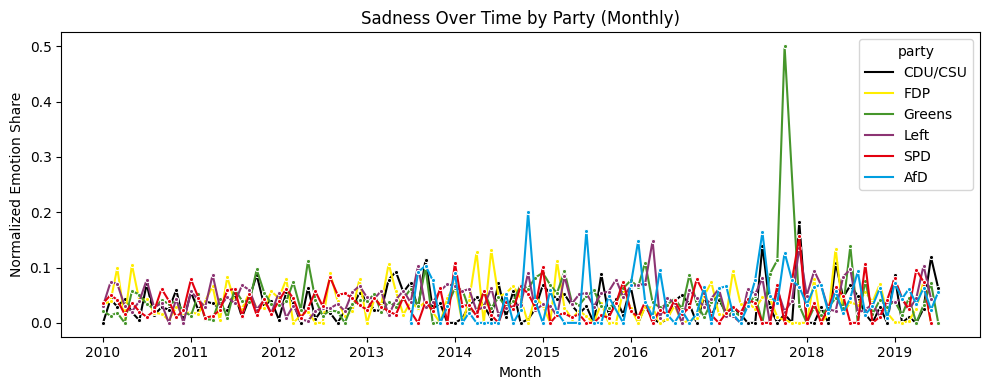

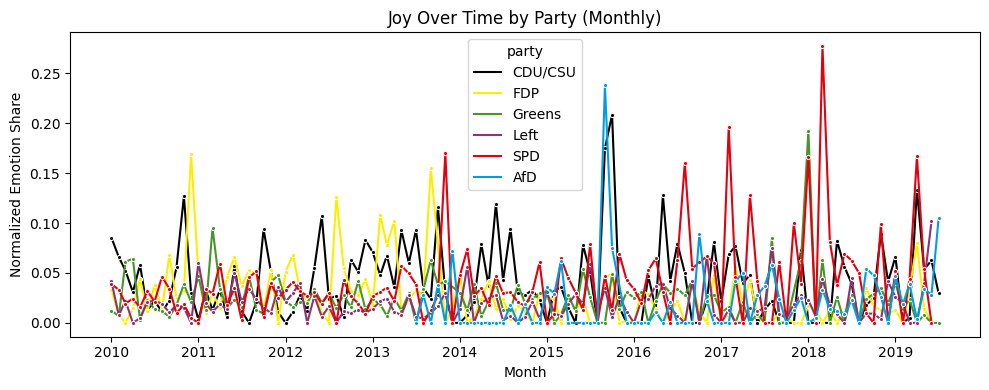

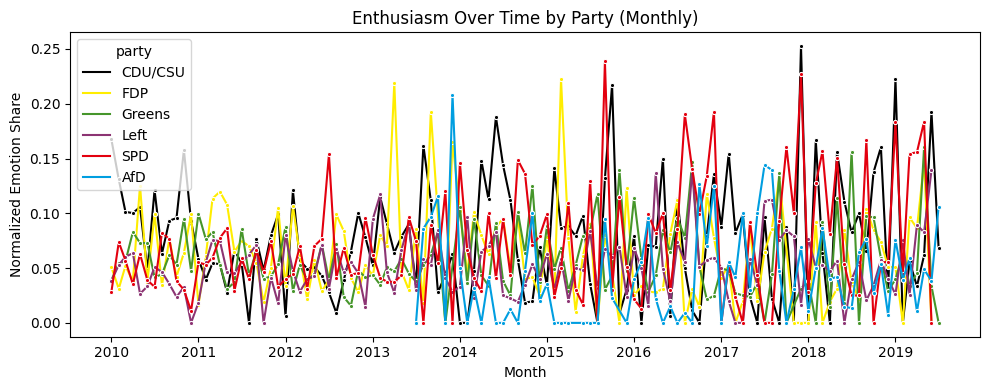

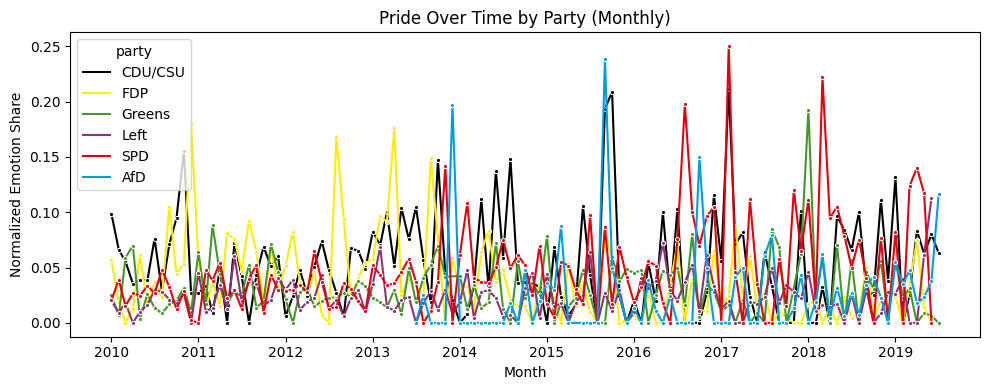

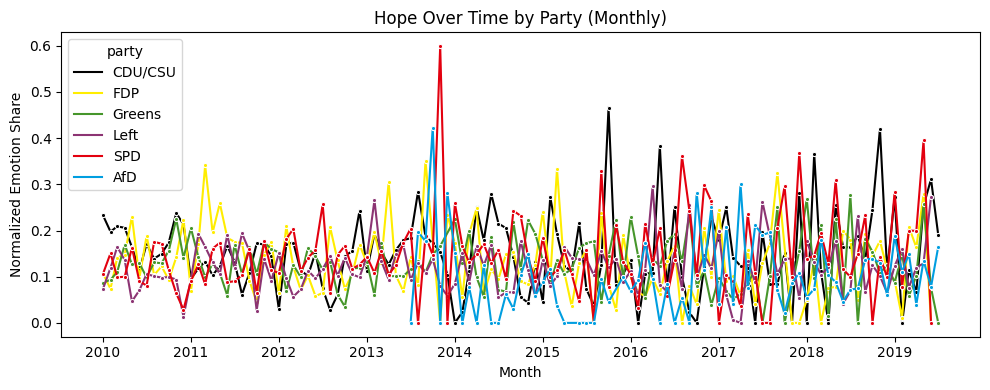

In [67]:
# Convert date and create month column
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# Melt emotion columns
df_melted_month = df_clean.melt(
    id_vars=['month', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_month['emotion'] = df_melted_month['emotion'].str.replace('_norm', '')

# Group by month, party, emotion
df_monthly = df_melted_month.groupby(['month', 'party', 'emotion'])['value'].mean().reset_index()

# Plot each emotion over time by party
for emotion in emotion_cols:
    plt.figure(figsize=(10, 4))
    sns.lineplot(
        data=df_monthly[df_monthly['emotion'] == emotion],
        x='month',
        y='value',
        hue='party',
        palette=party_colors,
        marker='o',
        markersize=3,
        linewidth=1.5
    )
    plt.title(f'{emotion.title()} Over Time by Party (Monthly)')
    plt.xlabel('Month')
    plt.ylabel('Normalized Emotion Share')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

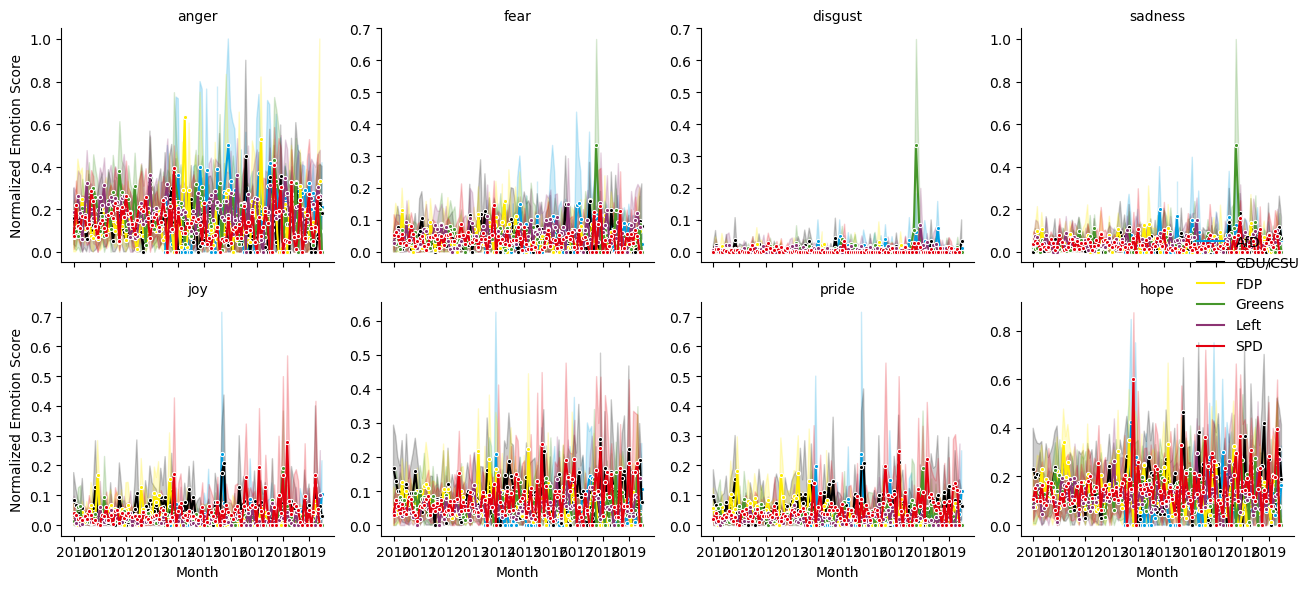

In [70]:
## arrange plots

# Make sure your month column is datetime
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# Melt normalized emotion columns
df_melted_month = df_clean.melt(
    id_vars=['month', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_month['emotion'] = df_melted_month['emotion'].str.replace('_norm', '')

# Plot with FacetGrid
g = sns.FacetGrid(
    df_melted_month,
    col="emotion",
    col_wrap=4,
    height=3,
    sharey=False
)
g.map_dataframe(
    sns.lineplot,
    x="month",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.5,
    markersize=3,
    palette=party_colors
)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Normalized Emotion Score")
plt.tight_layout()
plt.show()

-- *Line plot of each emotion by party over time (quarterly)*

In [11]:
# Create quarterly period
df_clean['quarter'] = pd.to_datetime(df_clean['date']).dt.to_period('Q').dt.start_time

# Melt emotion columns
df_melted_quarter = df_clean.melt(
    id_vars=['quarter', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_quarter['emotion'] = df_melted_quarter['emotion'].str.replace('_norm', '')

# Group by quarter, party, emotion
df_quarterly = df_melted_quarter.groupby(['quarter', 'party', 'emotion'])['value'].mean().reset_index()

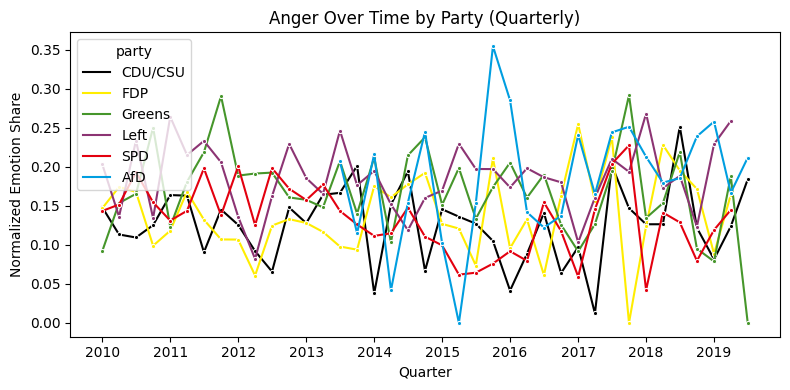

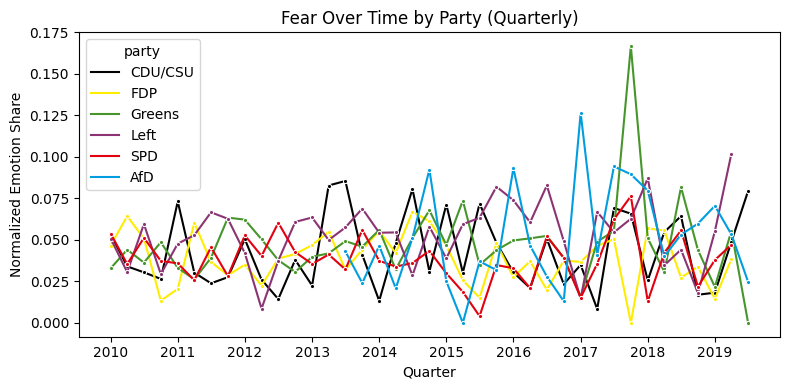

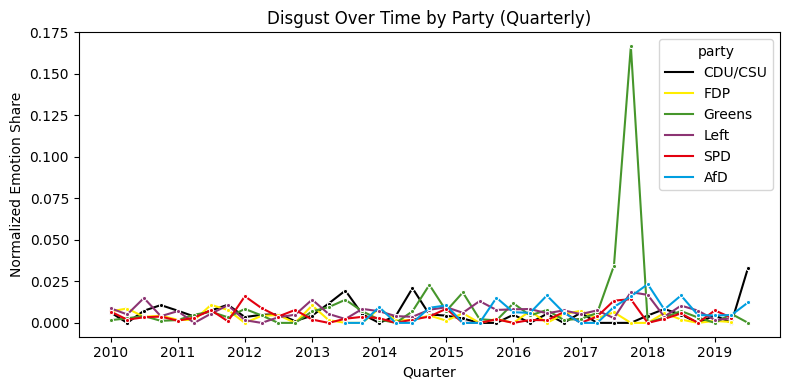

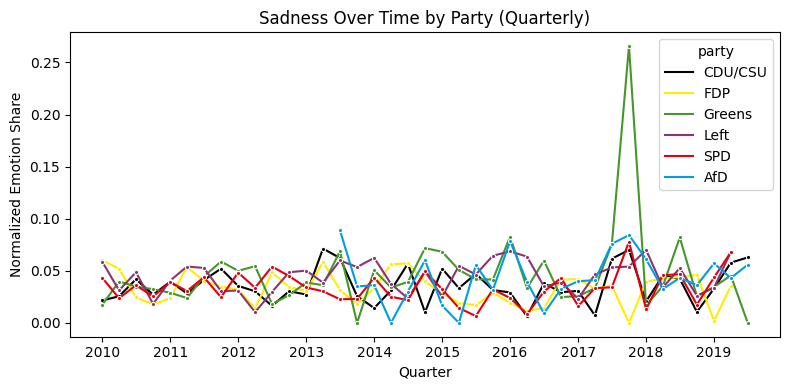

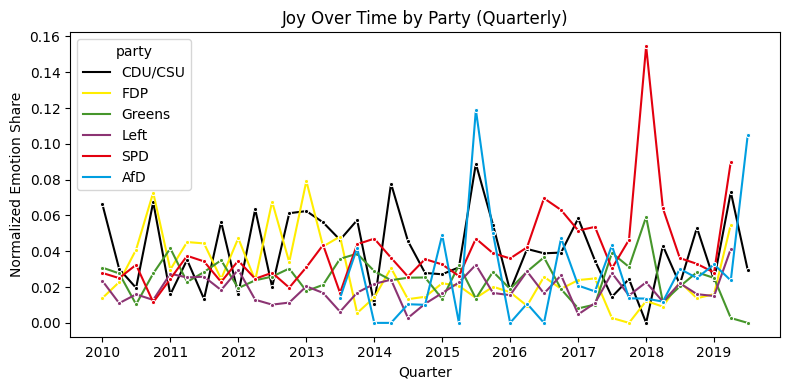

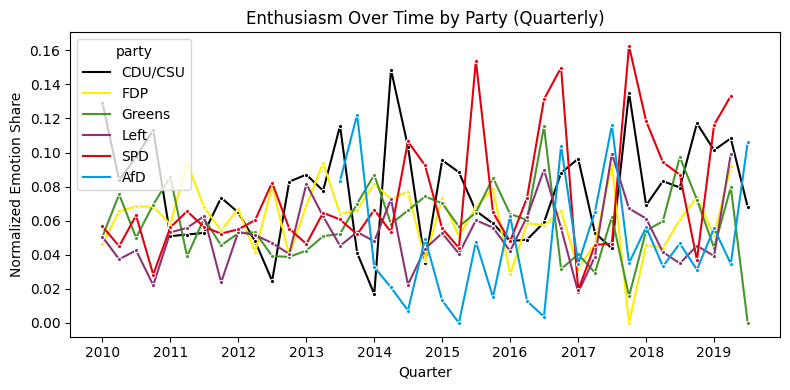

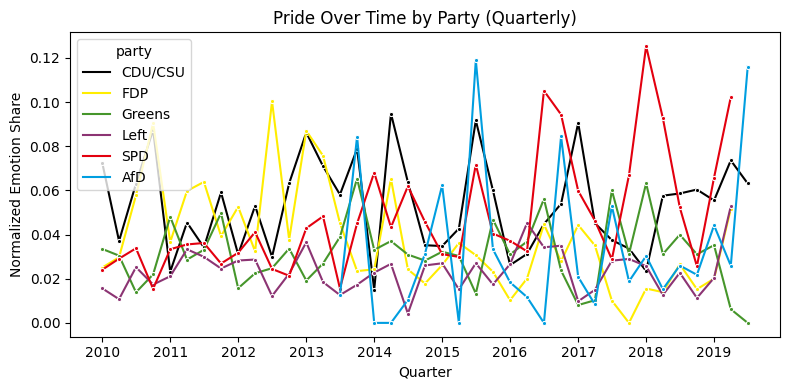

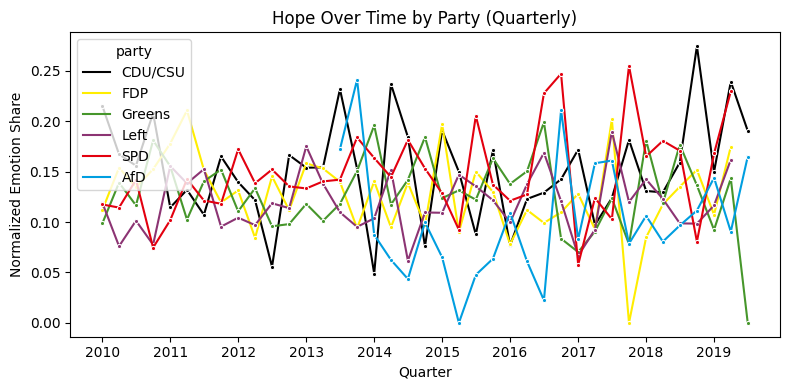

In [68]:
# Plot each emotion over time by party
for emotion in emotion_cols:
    plt.figure(figsize=(8, 4))
    sns.lineplot(
        data=df_quarterly[df_quarterly['emotion'] == emotion],
        x='quarter',
        y='value',
        hue='party',
        palette=party_colors,
        marker='o',
        markersize=3,
        linewidth=1.5
    )
    plt.title(f'{emotion.title()} Over Time by Party (Quarterly)')
    plt.xlabel('Quarter')
    plt.ylabel('Normalized Emotion Share')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

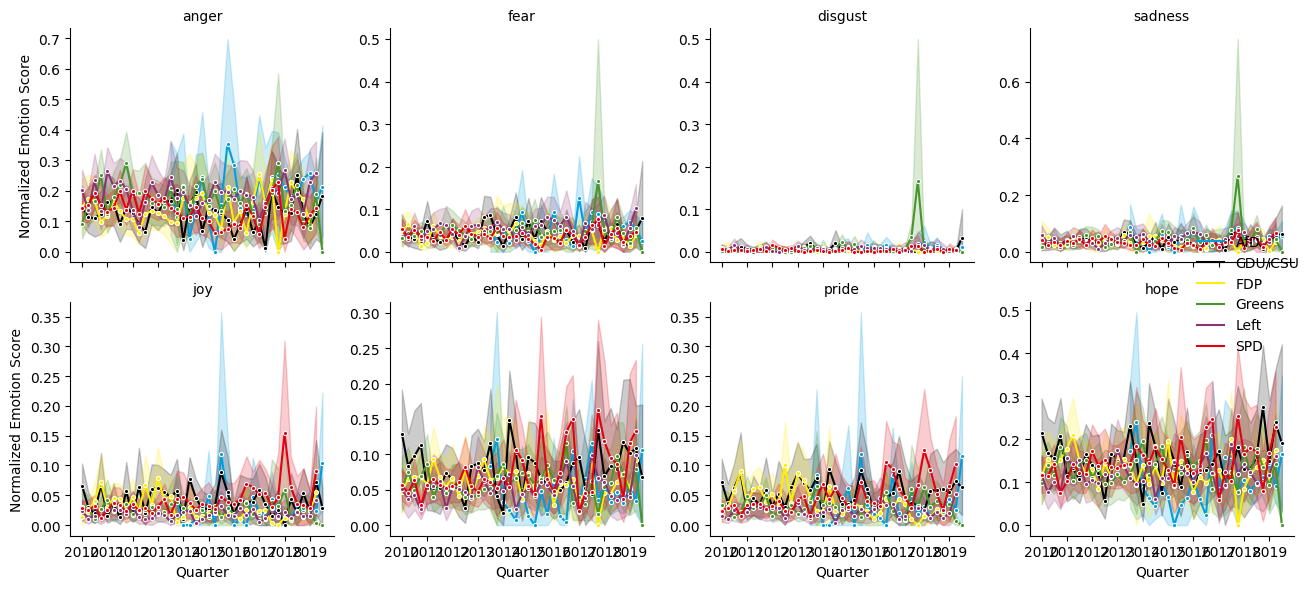

In [71]:
## arrange plots

df_clean['quarter'] = pd.to_datetime(df_clean['date']).dt.to_period('Q').dt.start_time

# Melt quarterly
df_melted_quarter = df_clean.melt(
    id_vars=['quarter', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_quarter['emotion'] = df_melted_quarter['emotion'].str.replace('_norm', '')

# FacetGrid for quarterly
g = sns.FacetGrid(df_melted_quarter, col="emotion", col_wrap=4, height=3, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x="quarter",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.5,
    markersize=3,
    palette=party_colors
)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Quarter", "Normalized Emotion Score")
plt.tight_layout()
plt.show()

<hr style="opacity: 0.25">

### Run regressions

In [12]:
# prepare df for regressions
df_reg = df_quarterly.pivot_table(index=['quarter', 'party'], columns='emotion', values='value').reset_index()

In [ ]:
# decide on dependent variables and add independent variables



In [13]:
# run regression

# example: anger as DV, others as IVs
model = smf.ols('anger ~ joy + fear + disgust + sadness + enthusiasm + pride + hope', data=df_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  anger   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     42.81
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           4.05e-37
Time:                        20:05:42   Log-Likelihood:                 406.34
No. Observations:                 217   AIC:                            -796.7
Df Residuals:                     209   BIC:                            -769.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0496      0.009      5.437      0.0

<hr style="opacity: 0.25">

### Most discussed issues

-- *Look at most frequently discussed issues*

In [10]:
# count how many press releases cover each issue
issue_counts = df_clean['issue_mono'].value_counts().reset_index()
issue_counts.columns = ['issue_mono', 'n_press_releases']

# preview the top issues
print(issue_counts.head(10))

   issue_mono  n_press_releases
0       191.0              1167
1         2.0               675
2        12.0               610
3         5.0               578
4       192.0               552
5        15.0               550
6         9.0               498
7         1.0               480
8         8.0               475
9         6.0               467


In [11]:
# Count number of PRs per party per issue
issue_party_counts = df_clean.groupby(['party', 'issue_mono']).size().reset_index(name='n_press_releases')

# Sort each group by n_press_releases descending and get top N
top_issues_per_party = (
    issue_party_counts
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .head(3)
    .reset_index(drop=True)
)

# Preview
print(top_issues_per_party)

      party  issue_mono  n_press_releases
0       AfD         9.0               134
1       AfD       192.0                86
2       AfD         2.0                80
3   CDU/CSU       191.0               211
4   CDU/CSU         2.0               125
5   CDU/CSU        15.0               107
6       FDP       191.0               164
7       FDP         1.0               157
8       FDP        12.0               115
9    Greens       191.0               240
10   Greens         4.0               128
11   Greens         8.0               115
12     Left       191.0               274
13     Left         5.0               243
14     Left        12.0               183
15      SPD       191.0               215
16      SPD         6.0               180
17      SPD        15.0               169


In [21]:
# filter to top N issues
top_issues = issue_counts['issue_mono'].head(7).tolist()

# Filter the dataset
df_top_issues = df_clean[df_clean['issue_mono'].isin(top_issues)].copy()

In [22]:
# melt and prepare data for plotting

# Melt emotion columns
df_melted_issues = df_top_issues.melt(
    id_vars=['month_dt', 'party', 'issue_mono'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.replace('_norm', '')
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.title()

-- *Immigration issue*

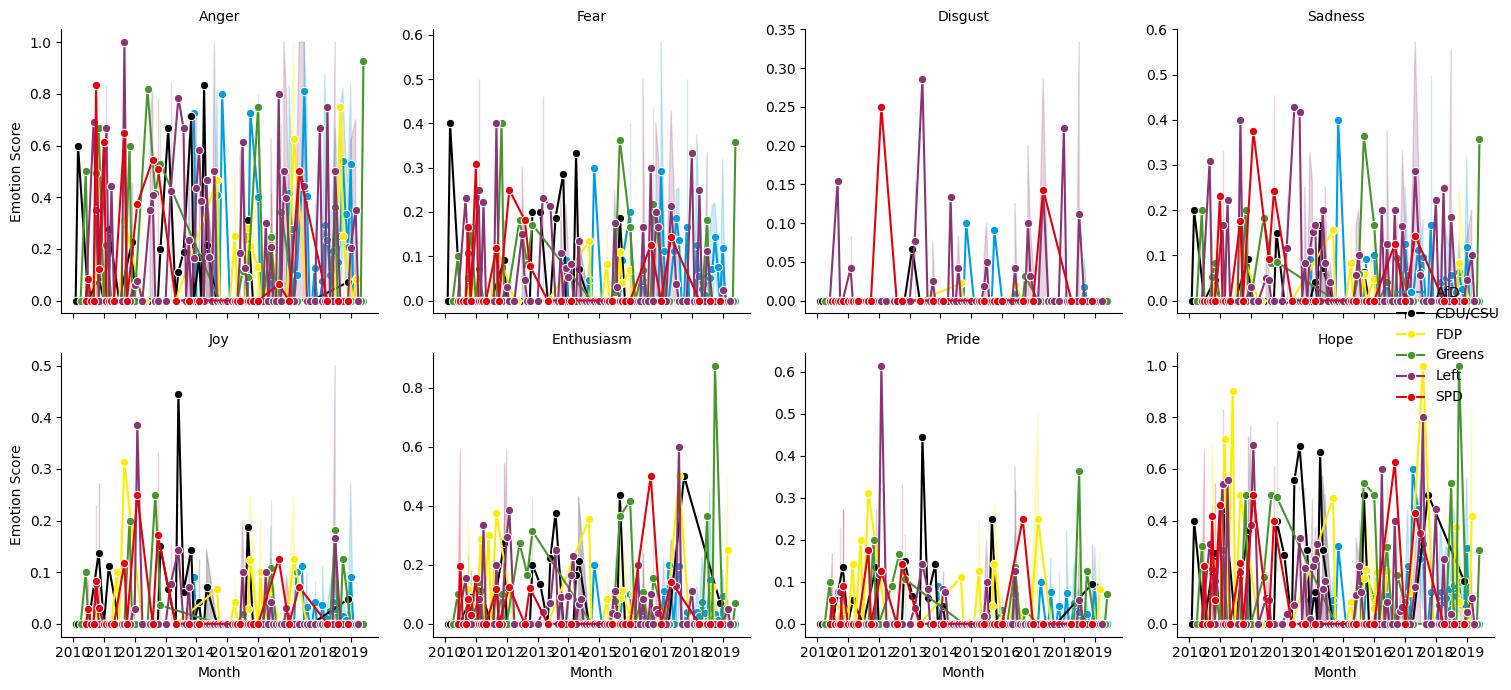

In [23]:
# facet by emotion, color by party, top issue

issue_focus = top_issues[6]
df_focus = df_melted_issues[df_melted_issues['issue_mono'] == issue_focus]

g = sns.FacetGrid(df_focus, col="emotion", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x="month_dt", y="value", hue="party",
    marker="o", #markersize=3,
    linewidth=1.5, palette=party_colors
)
g.set_titles(col_template="{col_name}")
g.add_legend()
g.set_axis_labels("Month", "Emotion Score")
plt.tight_layout()
plt.show()